In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# EDA

In [41]:
# read data
user_profile = pd.read_csv('./dataset/user_profile.csv')

/Users/jacqueline/miniconda2/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
first_session = pd.read_csv('./dataset/first_session.csv')
#user_engagement = pd.read_csv('./dataset/user_engagement.csv')

In [42]:
user_profile.head()

,Unnamed: 0,user_id,user_signup_timestamp,state,zipcode,is_homeowner,gender,tradelines_avg_days_since_opened,tradelines_max_days_since_opened,tradelines_min_days_since_opened,...,total_mortgage_loans_balance,total_auto_loans_balance,total_student_loans_balance,count_inquiries_3_months,count_inquiries_6_months,count_inquiries_12_months,recent_bankruptcy_date,count_bankruptcy,age_bucket,credit_score_bucket
0,0,50991631a5e7fafd8b5856fc15e3d1a3af5dcf98,2018-07-25 21:06:12,AR,72762,True,Female,2385.16,7446.0,481.0,...,26049.0,0.0,0.0,0,0,0,NaN,0,"(45.0, 50.0]","(630.0, 635.0]"
1,1,18db173b8b0fb250985a4db2f3f8593ee9658707,2018-07-01 22:01:56,NE,68111,False,NaN,909.25,1780.0,152.0,...,0.0,12992.0,0.0,0,0,1,NaN,0,"(50.0, 55.0]","(575.0, 580.0]"
2,2,cabee62f0c4f26bb088f4a48d9ca5efa3a4f96e3,2018-07-02 08:47:21,AL,36078,False,Male,1544.00,3975.0,251.0,...,86987.0,0.0,0.0,0,0,1,NaN,0,"(50.0, 55.0]","(685.0, 690.0]"
3,3,bb34f48b56a57e834c5c612b835d5a691f7357e8,2018-07-02 02:07:53,MT,59923,True,Unisex,831.60,2573.0,40.0,...,148912.0,46046.0,0.0,3,3,12,NaN,0,"(50.0, 55.0]","(625.0, 630.0]"
4,4,6da929725c76c01aa151d97060df2e6bd051e31e,2018-07-03 17:36:42,PA,19040,False,Female,1226.60,2510.0,186.0,...,0.0,16262.0,24134.0,0,0,3,NaN,0,"(20.0, 25.0]","(630.0, 635.0]"


In [43]:
# missing values
user_profile.isnull().sum().sort_values(ascending=False)

recent_bankruptcy_date                       259814
avg_cc_utilization_ratio                     153656
max_cc_utilization_ratio                     153646
gender                                        34772
tradelines_max_days_since_opened              10593
tradelines_min_days_since_opened              10593
tradelines_avg_days_since_opened              10593
age_bucket                                     6957
count_open_installment_accounts_24_months         0
count_tradelines_condition_derogatory             0
count_tradelines_cc_opened_24_months              0
count_total_tradelines_opened_24_months           0
count_tradelines_closed_accounts                  0
credit_score_bucket                               0
count_tradelines_open_mortgages                   0
is_homeowner                                      0
zipcode                                           0
state                                             0
user_signup_timestamp                             0
user_id     

## User_profile
### Gender

In [44]:
# unknown gender
user_profile['gender'].isnull().sum(axis=0)

34772

In [45]:
user_profile['gender'] = user_profile['gender'].fillna('Unknown')

In [46]:
user_profile['gender'].value_counts()

Female     118914
Male        81854
Unisex      49951
Unknown     34772
Name: gender, dtype: int64

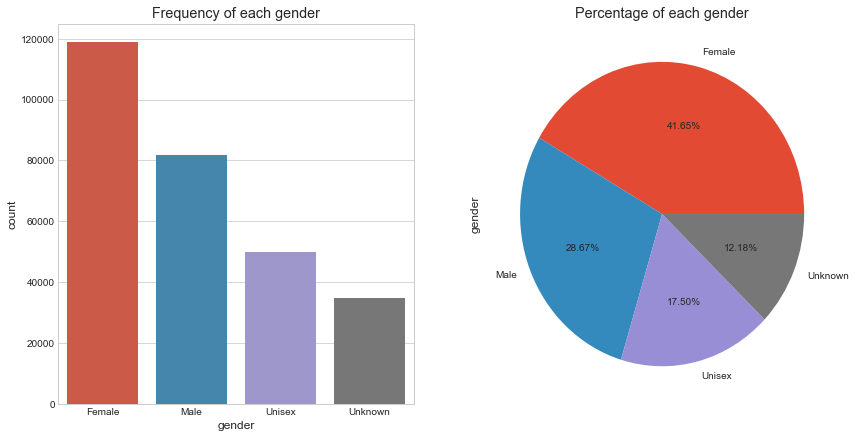

In [47]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='gender',data=user_profile,ax=axs[0], order = user_profile['gender'].value_counts().index)
axs[0].set_title("Frequency of each gender")
user_profile['gender'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each gender")
plt.show()

### Age

In [48]:
# unknown gender
user_profile['age_bucket'].isnull().sum(axis=0)

6957

In [50]:
user_profile['age_bucket'] = user_profile['age_bucket'].fillna('Unknown')

In [58]:
user_profile['age_bucket'].unique()

array(['(45.0, 50.0]', '(50.0, 55.0]', '(20.0, 25.0]', '(35.0, 40.0]',
       '(30.0, 35.0]', '(25.0, 30.0]', '(60.0, 65.0]', '(70.0, 75.0]',
       '(40.0, 45.0]', '(65.0, 70.0]', '(75.0, 80.0]', '(55.0, 60.0]',
       '(90.0, 95.0]', '(15.0, 20.0]', 'Unknown', '(85.0, 90.0]',
       '(80.0, 85.0]', '(95.0, 100.0]'], dtype=object)

In [ ]:
mapping_dict = {
    'age_bucket': {
       '(15.0, 20.0]': 0,
        '(20.0, 25.0]': 1,
        '(25.0, 30.0]':2,
        '(30.0, 35.0]':3,
        '(35.0, 40.0]':4,
        '(40.0, 45.0]':5,
        '(45.0, 50.0]':6,
        '(50.0, 55.0]':7,
        '(55.0, 60.0]':8,      
        
        
    }
}

In [27]:
user_profile['age_bucket'].value_counts()

(25.0, 30.0]     34237
(30.0, 35.0]     34168
(35.0, 40.0]     33043
(45.0, 50.0]     29663
(40.0, 45.0]     29388
(50.0, 55.0]     28316
(55.0, 60.0]     24160
(20.0, 25.0]     22872
(60.0, 65.0]     17300
(65.0, 70.0]     10861
(70.0, 75.0]      5682
(15.0, 20.0]      4617
(75.0, 80.0]      2631
(80.0, 85.0]      1074
(85.0, 90.0]       376
(90.0, 95.0]        95
(95.0, 100.0]       51
Name: age_bucket, dtype: int64

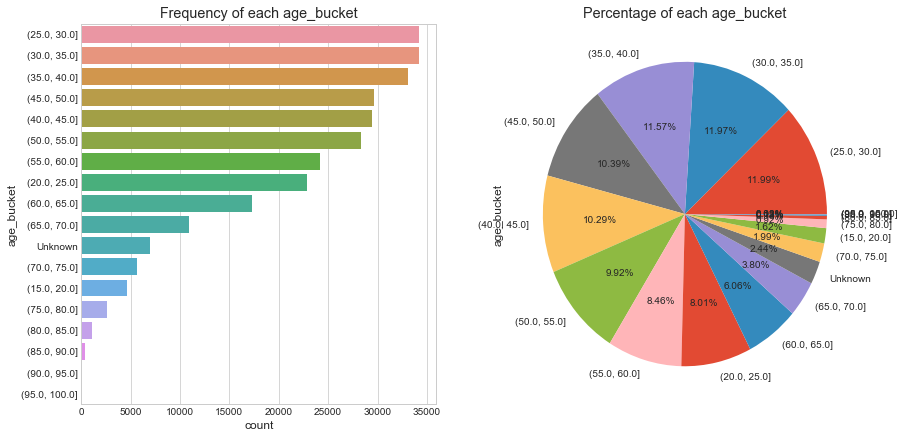

In [59]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(y='age_bucket',data=user_profile,ax=axs[0], order = user_profile['age_bucket'].value_counts().index)
axs[0].set_title("Frequency of each age_bucket")
user_profile['age_bucket'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each age_bucket")
plt.show()

### State

In [60]:
# unknown state
user_profile['state'].isnull().sum(axis=0)

0

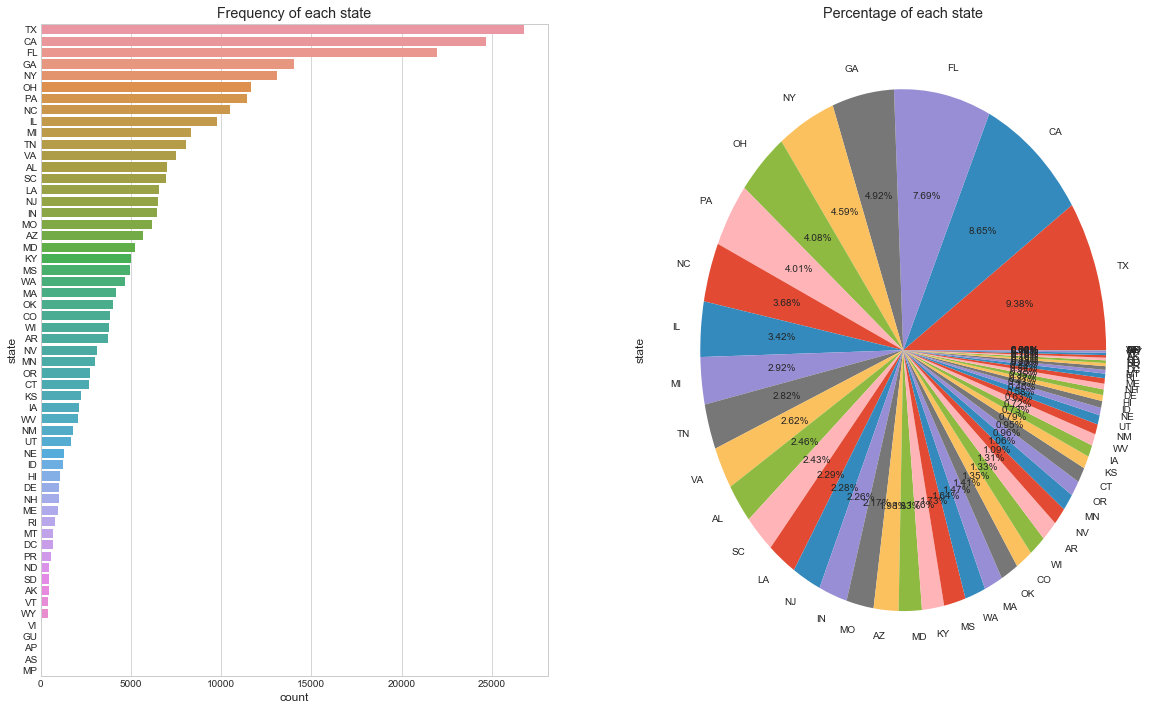

In [78]:
fig, axs = plt.subplots(1,2,figsize=(20,12))
sns.countplot(y='state',data=user_profile,ax=axs[0], order = user_profile['state'].value_counts().index)
axs[0].set_title("Frequency of each state")
user_profile['state'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each state")
plt.show()

In [136]:
user_profile['user_id'].unique().shape

(285491,)

## First Session

In [131]:
first_session.head(10)

,Unnamed: 0,user_id,session_id,session_start_timestamp,user_signup_timestamp,action_timestamp,action_type,page_name,offer_lender,offer_product,offer_page_position,offer_card_id,browser_name,browser_version,app_version,login_platform,os_name
0,0,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:12,VIEW_OFFER,AOOP_OVERVIEW,28cbeb8ca583aa3e0bf3a600d22058e689b4192a,CREDIT_PRODUCTS,BAD_PAYMENT_HISTORY,NaN,Chrome Mobile,60.00000,NaN,Mobile Web,Android
1,1,acb0e8ad94ec4c312994c5470e904482e9658d2c,fb4244f86c81e927e883e6a75bc4f3739aabdfdc,2018-07-02 04:15:24,2018-07-02 04:15:24,2018-07-02 04:20:36,CLICK_APPLY,AOOP_OVERVIEW,957c024b38ce820878f03177ce3d2b83c26a82d0,CREDIT_CARDS,HIGHER_CREDIT_LIMIT,efb19b2e222f635a683c0269835dace597b88bda,Chrome Mobile,67.00000,NaN,Mobile Web,Android
2,2,1372d7e3254ca0898cb69723c8baf66599453fd7,e1eed6059cc54c7e714b46aa22db6dc5a2c8357c,2018-07-01 13:11:58,2018-07-01 13:11:58,2018-07-01 13:15:03,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_FOUNDATION,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,67.00000,NaN,Mobile Web,Android
3,3,a9b3bcfeb31897a3057bd88a313299332004264c,38104d792bee1ba308e35020de93c24992db2442,2018-07-04 21:46:36,2018-07-04 21:46:36,2018-07-04 21:49:00,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_FOUNDATION,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,67.00000,NaN,Mobile Web,Android
4,4,03b0daa0bb58ae46205d8fc3f5f783885370cec8,c46278ce045921e4d2b5236d49154e7811dfe65b,2018-07-02 14:45:36,2018-07-02 14:45:36,2018-07-02 14:49:36,VIEW_OFFER,AOOP_OVERVIEW,957c024b38ce820878f03177ce3d2b83c26a82d0,CREDIT_CARDS,HIGHER_CREDIT_LIMIT,efb19b2e222f635a683c0269835dace597b88bda,Mobile Safari,11.00000,NaN,Mobile Web,OS X
5,5,ba8480a937f3c4dda8f87f946f418a0e9b055766,b5364a621d8fb517bcb48406f06f86dce9068ccb,2018-07-03 17:44:44,2018-07-03 17:44:44,2018-07-03 17:57:16,VIEW_OFFER,AOOP_OVERVIEW,957c024b38ce820878f03177ce3d2b83c26a82d0,CREDIT_CARDS,HIGHER_CREDIT_LIMIT,efb19b2e222f635a683c0269835dace597b88bda,Chrome Mobile,64.00000,NaN,Mobile Web,Android
6,6,ec4cbd28a25950cbe619b2ea36995e86c09388b0,4cb2ab2e208d6d514877106bb737bbbc21db2b59,2018-07-01 13:59:07,2018-07-01 13:59:07,2018-07-01 14:00:53,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_FOUNDATION,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Microsoft Edge,17.17134,NaN,Web,Windows
7,7,a2493dc77aa71e1368c15a501c07bc12c0a64ed7,f5ac4415220df8b5aa5cce70439b8a5e9c336ff2,2018-07-04 15:11:58,2018-07-04 15:11:58,2018-07-04 15:18:41,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_FOUNDATION,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,67.00000,NaN,Mobile Web,Android
8,8,a08a1bf1d35af890b30d42c6bcc68311452d0467,ebcb554825b10fe10d9ebcc06937e8eb27cd2b3b,2018-07-05 20:14:07,2018-07-05 20:14:07,2018-07-05 20:16:20,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_FOUNDATION,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,66.00000,NaN,Mobile Web,Android
9,9,146b1fd7ab5d78d18278e4f390d8360d19dec938,9a217a3274c7e6fc6a5616ef7a19cd1e2f150909,2018-07-05 17:37:41,2018-07-05 17:37:41,2018-07-05 17:40:37,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_FOUNDATION,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,67.00000,NaN,Mobile Web,Android


In [88]:
# convert to time stamps
first_session['session_start_timestamp'] = pd.to_datetime(first_session['session_start_timestamp'])
first_session['user_signup_timestamp'] = pd.to_datetime(first_session['user_signup_timestamp'])
first_session['action_timestamp'] = pd.to_datetime(first_session['action_timestamp'])

In [159]:
# for a certain user
first_session.loc[first_session['user_id']=='f62a28b472cd2bc1d9dde65795aaaf443f624c35',:].sort_values(by=['action_timestamp'])

,Unnamed: 0,user_id,session_id,session_start_timestamp,user_signup_timestamp,action_timestamp,action_type,page_name,offer_lender,offer_product,offer_page_position,offer_card_id,browser_name,browser_version,app_version,login_platform,os_name
6652508,7087411,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:05:41,VIEW_PAGE,SIGNUP2A_-_PROFILE,NaN,NaN,NaN,NaN,Chrome Mobile,60.0,NaN,Mobile Web,Android
4507129,4820556,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:10:43,LOGGED_IN,NaN,NaN,NaN,NaN,NaN,Chrome Mobile,60.0,NaN,Mobile Web,Android
3821394,4054078,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:03,VIEW_PAGE,AOOP_OVERVIEW,NaN,NaN,NaN,NaN,Chrome Mobile,60.0,NaN,Mobile Web,Android
0,0,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:12,VIEW_OFFER,AOOP_OVERVIEW,28cbeb8ca583aa3e0bf3a600d22058e689b4192a,CREDIT_PRODUCTS,BAD_PAYMENT_HISTORY,NaN,Chrome Mobile,60.0,NaN,Mobile Web,Android
4650,4783,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:12,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,NEW_CC_-_SCORE_OVER_TIME,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,60.0,NaN,Mobile Web,Android
847720,866471,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:12,VIEW_OFFER,AOOP_OVERVIEW,6e88c6cabf39650b2a8a2d27efe6e8d463a57a4b,PERSONAL_LOANS,FEATURED_AD,6e88c6cabf39650b2a8a2d27efe6e8d463a57a4b,Chrome Mobile,60.0,NaN,Mobile Web,Android
3285163,3470826,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:12,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_FOUNDATION,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,60.0,NaN,Mobile Web,Android
3370121,3563197,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:12,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,CREDIT_USAGE,5502f78e04da8189db32aa847bdf9b4242782911,Chrome Mobile,60.0,NaN,Mobile Web,Android
5087515,5413716,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:12,VIEW_OFFER,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,HIGHER_CREDIT_LIMIT,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,60.0,NaN,Mobile Web,Android
3732339,3954280,f62a28b472cd2bc1d9dde65795aaaf443f624c35,17566e14dd5d2fb787e2eb68db7a95f92d1219b9,2018-07-02 15:05:35,2018-07-02 15:05:35,2018-07-02 15:11:57,CLICK_APPLY,AOOP_OVERVIEW,3cc72f3330fc351b3436555f52573c94c18f5921,CREDIT_CARDS,NEW_CC_-_SCORE_OVER_TIME,0fb64d0ed53fa2e4623566af89e4ebc631384f31,Chrome Mobile,60.0,NaN,Mobile Web,Android


In [90]:
first_session.dtypes

Unnamed: 0                          int64
user_id                            object
session_id                         object
session_start_timestamp    datetime64[ns]
user_signup_timestamp      datetime64[ns]
action_timestamp           datetime64[ns]
action_type                        object
page_name                          object
offer_lender                       object
offer_product                      object
offer_page_position                object
offer_card_id                      object
browser_name                       object
browser_version                   float64
app_version                        object
login_platform                     object
os_name                            object
dtype: object

In [142]:
# see the length of session
user_session = first_session.groupby(['user_id','session_id'], as_index=False)['session_start_timestamp','action_timestamp'].max()
user_session.head()

,user_id,session_id,session_start_timestamp,action_timestamp
0,0000485dbdc19e76bedcaf155b4de9491f414a27,2f0a230bc6c60d584a8e45456f49e7c560f9bd04,2018-07-03 04:20:24,2018-07-03 04:25:38
1,00008fb52ca81c6767db31f58ea37e7229c372e1,1e80d72011110238e36e73a225c32822660eb028,2018-07-24 21:13:12,2018-07-24 21:18:29
2,000091252c68230bd55a9abda98896c8610994bc,1a62a01395fcf226ea684bc4a61c4a1432ac3cd7,2018-07-08 14:54:20,2018-07-08 15:02:44
3,000091d428154729cbf338d4f51aa95af254d342,1590fe01374b0c4294d5f77e7fae6c9d17492f00,2018-07-09 00:50:27,2018-07-09 01:02:06
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,7ebb433e7b9543abee828108834e8c2a85d878b1,2018-07-28 00:50:02,2018-07-28 00:52:00


In [143]:
# calculate the session length
user_session['session_length'] = user_session['action_timestamp'] - user_session['session_start_timestamp']
user_session['session_length'] = user_session['session_length'].dt.total_seconds()
user_session.head()

,user_id,session_id,session_start_timestamp,action_timestamp,session_length
0,0000485dbdc19e76bedcaf155b4de9491f414a27,2f0a230bc6c60d584a8e45456f49e7c560f9bd04,2018-07-03 04:20:24,2018-07-03 04:25:38,314.0
1,00008fb52ca81c6767db31f58ea37e7229c372e1,1e80d72011110238e36e73a225c32822660eb028,2018-07-24 21:13:12,2018-07-24 21:18:29,317.0
2,000091252c68230bd55a9abda98896c8610994bc,1a62a01395fcf226ea684bc4a61c4a1432ac3cd7,2018-07-08 14:54:20,2018-07-08 15:02:44,504.0
3,000091d428154729cbf338d4f51aa95af254d342,1590fe01374b0c4294d5f77e7fae6c9d17492f00,2018-07-09 00:50:27,2018-07-09 01:02:06,699.0
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,7ebb433e7b9543abee828108834e8c2a85d878b1,2018-07-28 00:50:02,2018-07-28 00:52:00,118.0


In [144]:
1809 / 284564

0.006357093659071422

In [145]:
# negative values, 1809 rows, dump.
user_session.loc[user_session['session_length'] < 0,:].shape

(1809, 5)

In [146]:
# keep only >0
user_session = ses_period.loc[ses_period['session_length'] >= 0,:]

In [155]:
user_session[user_session['user_id'].duplicated(keep=False)]

,user_id,session_id,session_start_timestamp,action_timestamp,session_length
43863,278da83e63c507fc7525725ae0c46836a6e9d850,4d5066af64bfd84b340e27cf63c6099d9b660384,2018-06-30 21:23:38,2018-07-01 04:23:40,25202.0
43864,278da83e63c507fc7525725ae0c46836a6e9d850,a53fbf906cc1dc6d62118a64024fcb4e66d5b284,2018-06-30 21:23:38,2018-07-01 04:23:45,25207.0


In [157]:
# drop duplicate
user_session = user_session.drop(43863)
user_session.shape

(282755, 5)

In [147]:
user_session['session_length'].describe()

count    282756.000000
mean        887.350451
std        3192.229257
min           0.000000
25%         243.000000
50%         383.000000
75%         628.000000
max      168765.000000
Name: session_length, dtype: float64

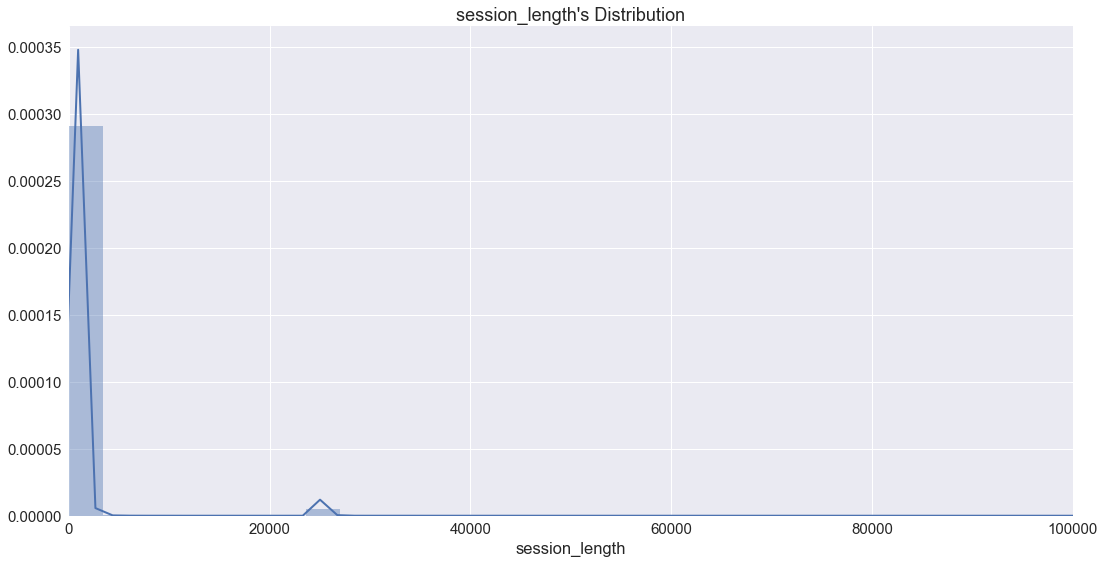

In [148]:
plt.figure(figsize=(18,9))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
plot_session_length = sns.distplot(user_session['session_length'])

plot_session_length.set_xlim(-10, 100000)

plt.xlabel('session_length')
plt.title('session_length\'s Distribution')
#plot_loan.figure.savefig('session_length')

## user apply for card

In [158]:
all_user_id = user_session['user_id'].unique()
all_user_id.shape

(282755,)

In [169]:
apply_card_user_id = first_session.loc[first_session['action_type'] == 'CLICK_APPLY','user_id'].values
apply_card_user_id.shape


(149954,)

In [171]:
user_session['apply_card'] = user_session['user_id'].apply(lambda x: x in apply_card_user_id)
user_session.head()

KeyboardInterrupt: 

## Feature Engineering